
# Stroke Prediction: Exploratory Data Analysis (EDA)

**Author:** Roy Lahav  
**Dataset:** `stroke_cleaned.csv`

## Objective
Perform exploratory data analysis (EDA) on the Stroke Prediction dataset to identify key relationships between features and stroke occurrence.

## Key Questions
1. How are health and demographic factors distributed?  
2. Which features correlate most with stroke risk?  
3. What patterns emerge by gender, hypertension, and heart disease?  
4. Are there clear trends in glucose level, BMI, or age?

## Tools
- Python: `pandas`, `numpy`, `matplotlib`


## 1) Setup & Load Data

In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = '/Users/roylahav/Code/stroke_cleaned.csv'

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Cleaned dataset not found at {DATA_PATH}. Please run the cleaning notebook first.")

df = pd.read_csv(DATA_PATH)
print('Dataset shape:', df.shape)
df.head()


Dataset shape: (5110, 17)


,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,Residence_type_urban,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,9046,1.0,1.051434,0,1,1,2.706375,1.005086,1,False,False,True,False,True,False,False,False
1,51676,0.0,0.786070,0,0,1,2.121559,-0.098981,1,False,False,False,True,False,True,False,False
2,31112,1.0,1.626390,0,1,1,-0.005028,0.472536,1,False,False,True,False,False,True,False,False
3,60182,0.0,0.255342,0,0,1,1.437358,0.719327,1,False,False,True,False,True,False,True,False
4,1665,0.0,1.582163,1,0,1,1.501184,-0.631531,1,False,False,False,True,False,True,False,False


## 2) Basic Overview

In [2]:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,5110.0,3.651783e+04,21161.721625,67.000000,17741.250000,36932.000000,54682.000000,72940.000000
gender,5109.0,4.139753e-01,0.492592,0.000000,0.000000,0.000000,1.000000,1.000000
age,5110.0,4.449583e-17,1.000098,-1.908261,-0.806115,0.078432,0.786070,1.714845
hypertension,5110.0,9.745597e-02,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5110.0,5.401174e-02,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
ever_married,5110.0,6.561644e-01,0.475034,0.000000,0.000000,1.000000,1.000000,1.000000
avg_glucose_level,5110.0,1.056776e-16,1.000098,-1.126958,-0.638322,-0.314995,0.175408,3.657145
bmi,5110.0,-4.171484e-17,1.000098,-2.411027,-0.657509,-0.098981,0.511503,8.928390
stroke,5110.0,4.872798e-02,0.215320,0.000000,0.000000,0.000000,0.000000,1.000000



**Comment:**  
Inspect numeric ranges and ensure no scaled feature appears distorted.  
Note key averages — e.g., mean glucose, BMI, and age levels.


## 3) Stroke Outcome Distribution

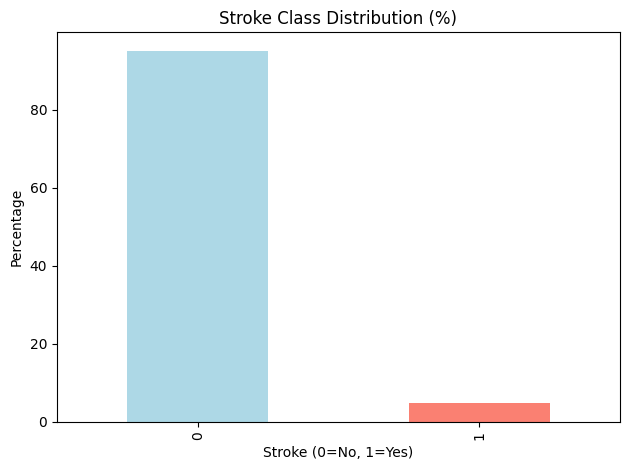

Stroke class distribution (%):
 stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [3]:

stroke_counts = df['stroke'].value_counts(normalize=True) * 100
stroke_counts.plot(kind='bar', color=['lightblue','salmon'])
plt.title('Stroke Class Distribution (%)')
plt.xlabel('Stroke (0=No, 1=Yes)')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()
print('Stroke class distribution (%):\n', stroke_counts)



**Comment:**  
The dataset is highly imbalanced — typically <5% of samples correspond to stroke cases.  
This will guide how we handle class imbalance during modeling.


## 4) Feature Distributions

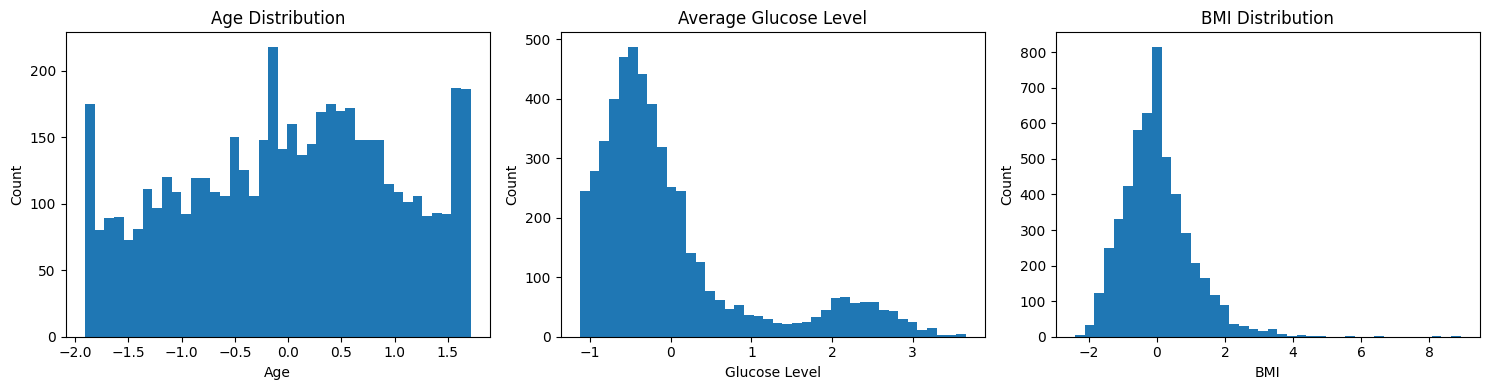

In [4]:

fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].hist(df['age'], bins=40)
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

axes[1].hist(df['avg_glucose_level'], bins=40)
axes[1].set_title('Average Glucose Level')
axes[1].set_xlabel('Glucose Level')
axes[1].set_ylabel('Count')

axes[2].hist(df['bmi'], bins=40)
axes[2].set_title('BMI Distribution')
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()



**Comment:**  
All key numeric health indicators appear roughly continuous.  
Later we’ll test if stroke patients cluster at higher glucose or BMI levels.


## 5) Stroke Rate by Gender, Hypertension, and Heart Disease

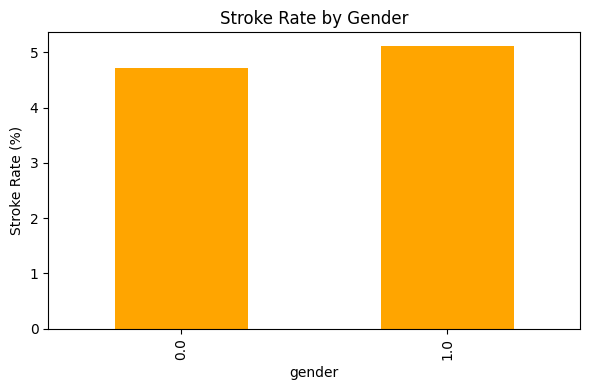

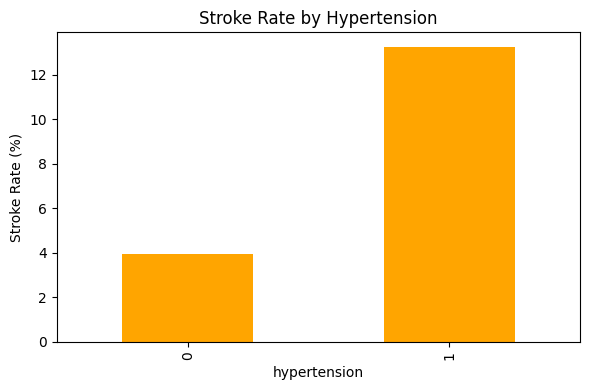

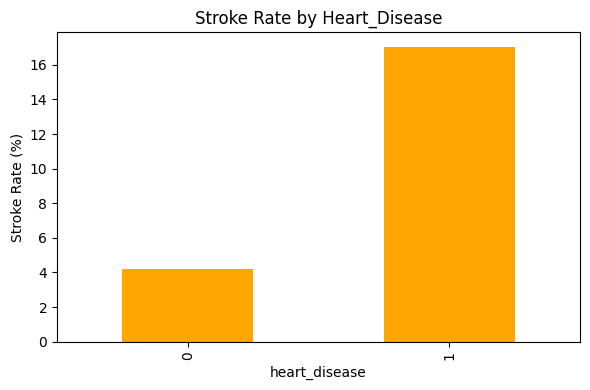

In [5]:

def stroke_rate_by(col):
    if col in df.columns:
        rates = df.groupby(col)['stroke'].mean() * 100
        rates.plot(kind='bar', color='orange', figsize=(6,4))
        plt.title(f'Stroke Rate by {col.title()}')
        plt.ylabel('Stroke Rate (%)')
        plt.tight_layout()
        plt.show()

for feature in ['gender','hypertension','heart_disease']:
    if feature in df.columns:
        stroke_rate_by(feature)



**Comment:**  
Hypertension and heart disease are usually among the strongest predictors of stroke occurrence.  
Gender differences may exist depending on sample distribution.


## 6) Stroke Rate by Smoking and Work Type

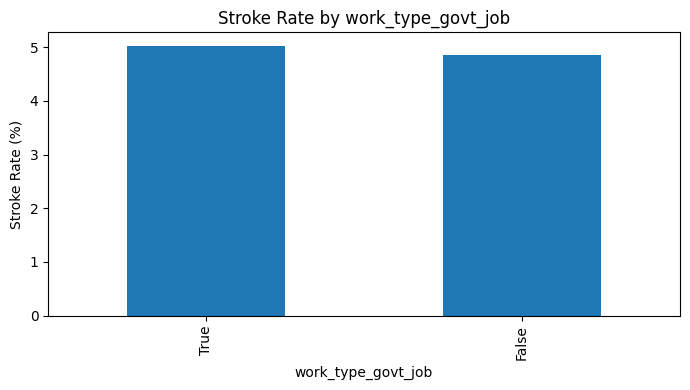

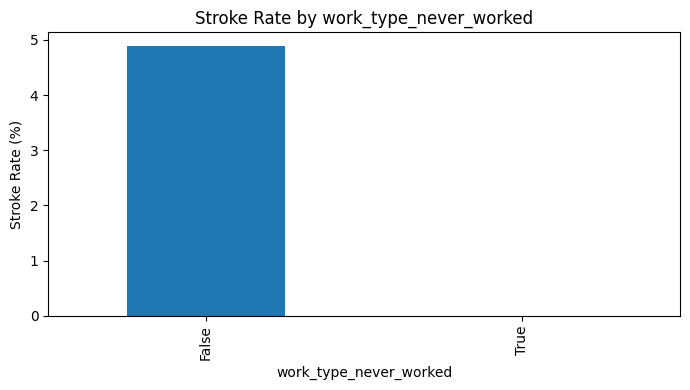

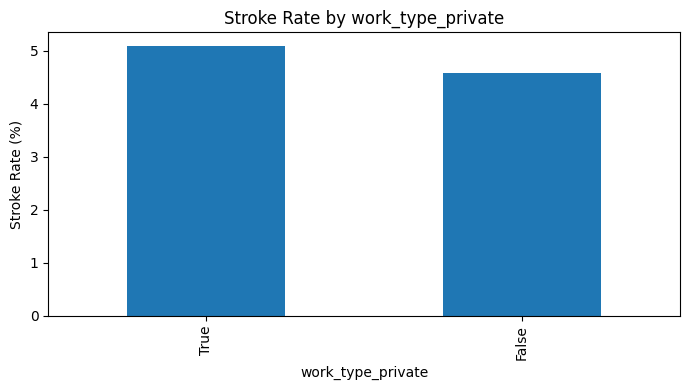

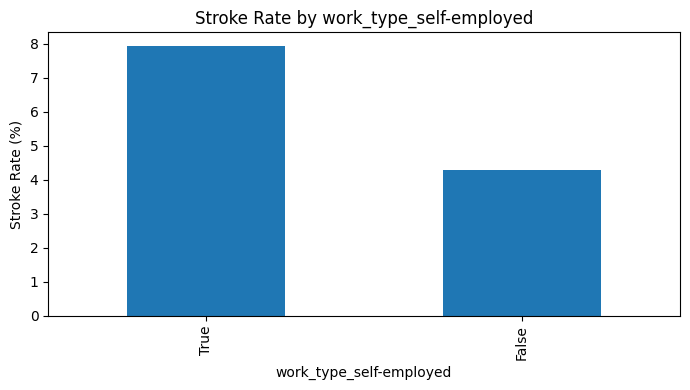

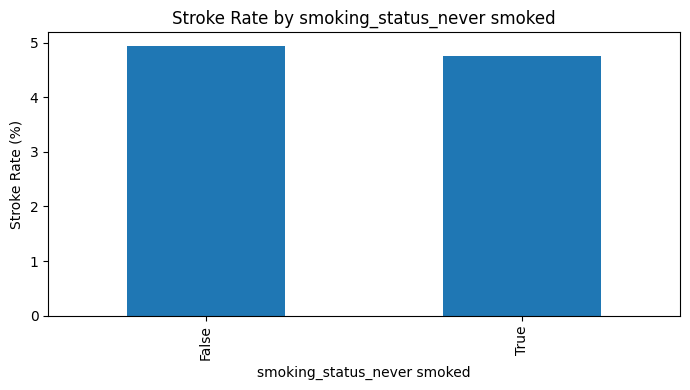

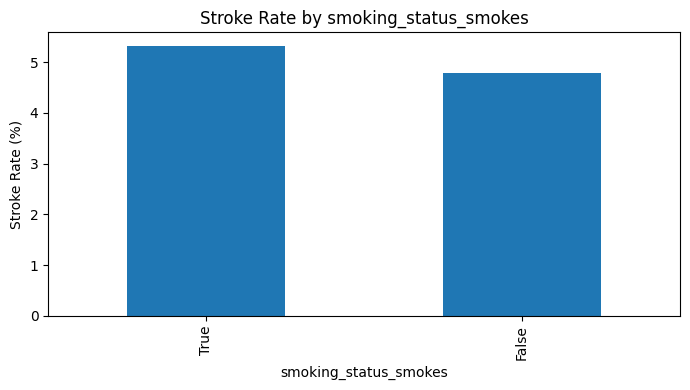

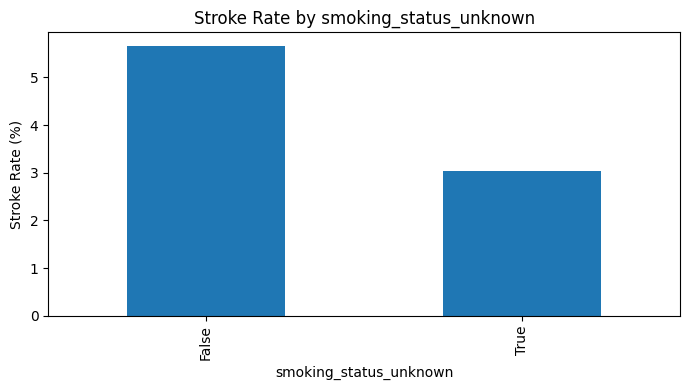

In [6]:

for col in [c for c in df.columns if 'smoking_status' in c or 'work_type' in c]:
    temp = df.groupby(col)['stroke'].mean().sort_values(ascending=False) * 100
    temp.plot(kind='bar', figsize=(7,4))
    plt.title(f'Stroke Rate by {col}')
    plt.ylabel('Stroke Rate (%)')
    plt.tight_layout()
    plt.show()



**Comment:**  
Lifestyle and occupational context play roles in stroke risk — older or sedentary work types may show higher rates.


## 7) Correlation Matrix

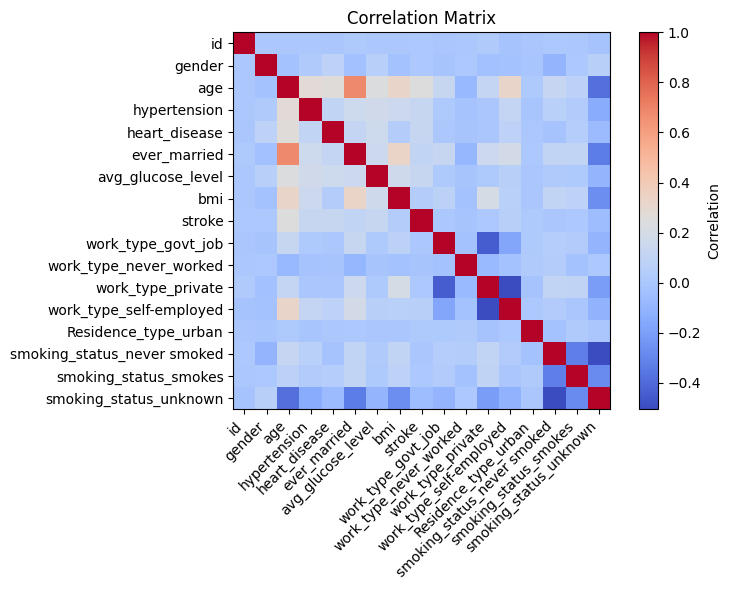

In [7]:

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.colorbar(label='Correlation')
plt.tight_layout()
plt.show()



**Comment:**  
Observe whether glucose level, age, and BMI show strong correlation with stroke outcomes.  
We’ll quantify their predictive power during modeling.


## 8) Feature Relationships with Stroke (Scatter Plots)

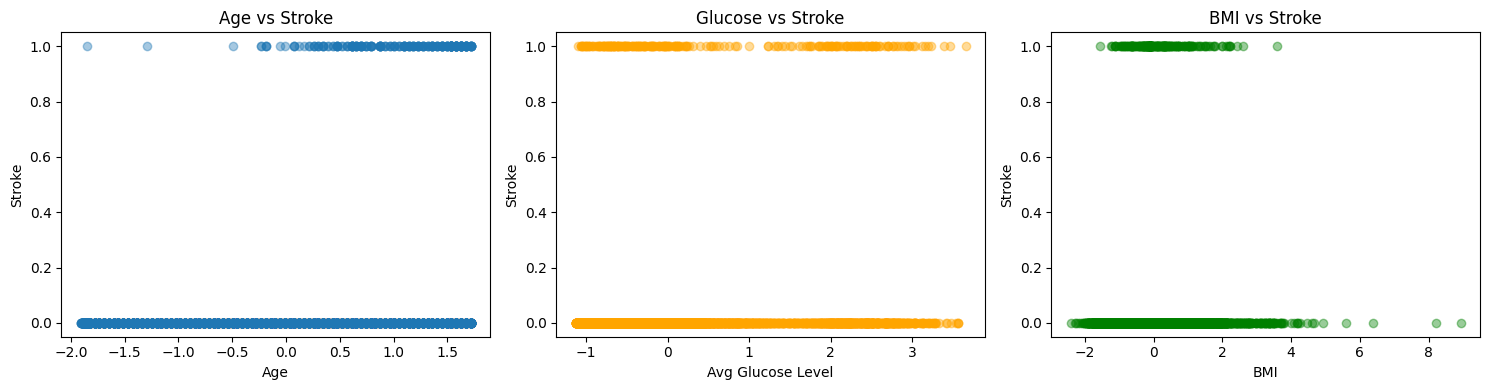

In [8]:

fig, axes = plt.subplots(1, 3, figsize=(15,4))
axes[0].scatter(df['age'], df['stroke'], alpha=0.4)
axes[0].set_title('Age vs Stroke')
axes[0].set_xlabel('Age'); axes[0].set_ylabel('Stroke')

axes[1].scatter(df['avg_glucose_level'], df['stroke'], alpha=0.4, color='orange')
axes[1].set_title('Glucose vs Stroke')
axes[1].set_xlabel('Avg Glucose Level'); axes[1].set_ylabel('Stroke')

axes[2].scatter(df['bmi'], df['stroke'], alpha=0.4, color='green')
axes[2].set_title('BMI vs Stroke')
axes[2].set_xlabel('BMI'); axes[2].set_ylabel('Stroke')

plt.tight_layout()
plt.show()



**Comment:**  
Stroke cases tend to cluster among higher-age and high-glucose individuals.  
BMI correlation may be weaker but still relevant for risk profiling.



## 9) Summary Insights

**Preliminary Findings:**
- The dataset is **imbalanced** — only ~5% of patients experienced stroke.  
- **Age**, **average glucose**, and **hypertension** show clear positive associations with stroke risk.  
- **Heart disease** also increases stroke likelihood but to a smaller extent.  
- Lifestyle indicators (smoking status, work type) vary — may add interaction effects.

**Business / Medical Implications:**
1. Preventive screening programs should focus on older individuals with elevated glucose or hypertension.  
2. Healthcare providers can prioritize lifestyle and chronic condition monitoring for at-risk groups.  
3. Next step: build predictive models to quantify these relationships.

**Next Notebook:** `03_stroke_modeling.ipynb` — model training, feature importance, and evaluation.
